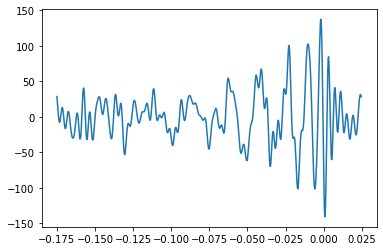

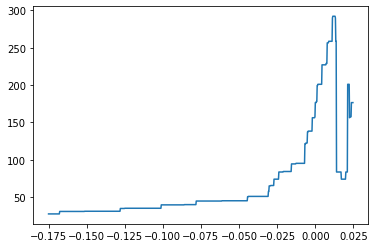

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')
plt.plot(time,data)
plt.show()
plt.plot(time,freq)
plt.show()

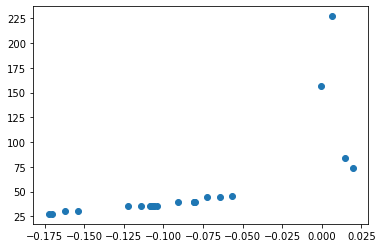

[ 10  18  52  86 216 248 273 274 279 280 283 291 346 386 387 388 420 453
 485 715 743 777 797]


In [2]:
index=np.where(abs(data)<1)[0]
plt.scatter(time[index],freq[index])
plt.show()
# print(time[index])
print(index)
# print(data)

In [3]:
i1=np.where(freq>50)[0]
i2=np.where(time>0)[0]
# print(i1,i2)
index2=np.where(i1>i2[0])[0]
time2=time[index2]
freq2=freq[index2]
from scipy.optimize import curve_fit as cf
from astropy import constants as const
def f(t,m):
    return((5**(3/8))*((const.G.value*m/const.c.value**3)**(-5/8))*((-t)**(-3/8))/(8*np.pi))
p_opt, p_cov = cf(f,time2,freq2)
print("Chirp mass=",p_opt[0])

Chirp mass= 7.580745918444491e+31


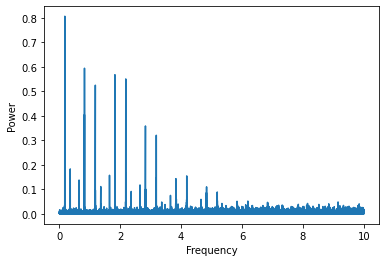

In [4]:
from astropy.timeseries import LombScargle
time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0005.dat", unpack=True)
frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)
plt.plot(frequency, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

In [5]:
period=1/frequency[np.argmax(power)]
print(period)
print("P_1 value on webpage is 5.6119491,which is very close to calculated value")

5.611181852696077
P_1 value on webpage is 5.6119491,which is very close to calculated value


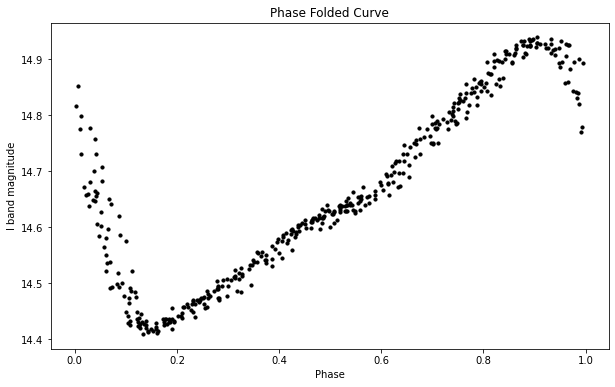

In [6]:
phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='k',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve")
plt.show()

In [7]:
import pandas as pd
from astropy.coordinates import SkyCoord
Messiers = []
for i in range(1, 111):
    
    Messier = str("Messier ") + str(i)
    Messiers.append(Messier)
    
data = {'Messier_Name': Messiers,
        'RA': [0]*110,
        'DEC': [0]*110}
  

df = pd.DataFrame(data)

for i in range(len(df)):
    Coordinate = SkyCoord.from_name(df['Messier_Name'][i])
    df['RA'][i] =Coordinate.ra.degree
    df['DEC'][i] =Coordinate.dec.degree

df.to_csv("Messiers.csv", index=None)
print(df.head())

<ipython-input-7-5a8de65e4172>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RA'][i] =Coordinate.ra.degree
<ipython-input-7-5a8de65e4172>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEC'][i] =Coordinate.dec.degree


  Messier_Name   RA  DEC
0    Messier 1   83   22
1    Messier 2  323    0
2    Messier 3  205   28
3    Messier 4  245  -26
4    Messier 5  229    2


<ipython-input-8-e207c8b7d2e9>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


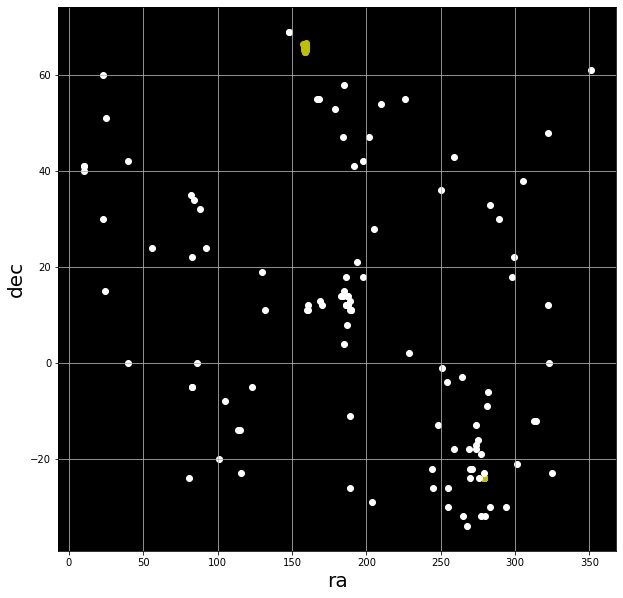

In [8]:
df_cluster = pd.read_csv('Clusters.csv')
plt.figure(figsize=(10,10))
plt.scatter(df_cluster['RA'],df_cluster['DEC'],c='y')
plt.scatter(df['RA'],df['DEC'],c='w')
plt.grid()
ax = plt.axes()
ax.set_facecolor("black")
plt.xlabel("ra",fontsize=20)
plt.ylabel("dec",fontsize=20)
plt.show()

In [9]:
df1=df_cluster.where(df_cluster["Cluster"]==1)
df2=df_cluster.where(df_cluster["Cluster"]==2)
ra1=np.mean(df1["RA"])
dec1=np.mean(df1["DEC"])
ra2=np.mean(df2["RA"])
dec2=np.mean(df2["DEC"])
def hav(a,b):
    a=a*np.pi/180
    b=b*np.pi/180
    return (np.sin(a-b))**2
def dist(dec1,ra1,dec2,ra2):
     return 0.5*np.arcsin(np.sqrt(hav(dec1,dec2)+(np.cos(dec1*np.pi/180))*(np.cos(dec2*np.pi/180))*(hav(ra1,ra2))))
for i in range(len(df)):
    if((abs(dist(dec1,ra1,df['DEC'][i],df['RA'][i])))<(np.pi/(360))):
                print(df["Messier_Name"][i])
    if((abs(dist(dec2,ra2,df['DEC'][i],df['RA'][i])))<(np.pi/(60))):
                print(df["Messier_Name"][i])
print(ra1," ",dec1)
print(df["Messier_Name"][21]," ",df["RA"][21]," ",df["DEC"][21]," distance=",dist(dec1,ra1,df['DEC'][21],df['RA'][21]))
print(ra2," ",dec2)
print(df["Messier_Name"][80]," ",df["RA"][80]," ",df["DEC"][80]," distance=",dist(dec2,ra2,df['DEC'][80],df['RA'][80]))
print(df["Messier_Name"][81]," ",df["RA"][81]," ",df["DEC"][81]," distance=",dist(dec2,ra2,df['DEC'][81],df['RA'][81]))
#Messier 22 and 81,82 are the nearest to the given cluster but M81,M82 are still a bit far away from the cluster 

Messier 22
Messier 81
Messier 82
279.1002484083667   -23.90191594401699
Messier 22   279   -23  distance= 0.007911518279407096
158.83323379097496   65.75444474392997
Messier 81   148   69  distance= 0.045900897545441514
Messier 82   148   69  distance= 0.045900897545441514


<ipython-input-9-2fc1329763ed>:12: RuntimeWarning: invalid value encountered in arcsin
  return 0.5*np.arcsin(np.sqrt(hav(dec1,dec2)+(np.cos(dec1*np.pi/180))*(np.cos(dec2*np.pi/180))*(hav(ra1,ra2))))
